In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [6]:
df = gpd.read_file('../Data/IceRises.geojson')
df = df[df['Area_km2'] < 1000]


In [7]:
avg_dia = 2 * np.sqrt(df['Area_km2'].mean()/np.pi)
avg_dia

9.21263560146303

In [8]:
list(df)

['id_icerise',
 'type',
 'type_text',
 'Name',
 'divide',
 'island',
 'isolated',
 'MOA2003',
 'MOA2009',
 'InSAR',
 'Area_km2',
 'nrofpoints',
 'vel_mean',
 'h_mean',
 'h_min',
 'h_max',
 'h_rise',
 'bed_mean',
 'bed_min',
 'bed_max',
 'thick',
 'slope_mean',
 'width',
 'length',
 'longi',
 'lati',
 'geometry']

In [24]:
rises = df.loc[df['type_text'] == 'Ice rise']
rises = rises.reset_index(drop=True)
rises
for i in df['Name']:
    print(i)

None
Kupol Moskovskij
Kupol Khroska
None
None
Kupol Ciolkovskogo
None
Kupol Koroleva
None
None
Kupol Lazareva
Otkrytij
None
None
None
None
Kupol Sadko
Djupranen
None
None
Kupol Mira
Kuvklaken
None
None
Kupol Druzhby
None
None
Leningradkollen
Kupol Universitetskij
None
None
None
Kupol Verbljud
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
McKinnon Island
None
Shaw Island
None
None
None
None
None
None
None
None
None
None
None
None
Tingey Rocks
None
Clemence Massif
Single Island
Budd Ice Rumples
Bjerk� Peninsula
None
Foley Promontory
None
Robertson Nunatak
None
None
Podlednyj holm
None
None
None
Gillock Island
Dog Island
None
None
None
None
None
None
Svarthausen Nunatak
None
None
None
None
None
None
None
Leskov Island
None
Mikhaylov Island
None
None
None
None
None
Zavadovskiy Island
None
None
None
None
None


In [10]:

avg_dia_rise = 2 * np.sqrt(rises['Area_km2'].median()/np.pi)
avg_dia_rise


10.910730125774348

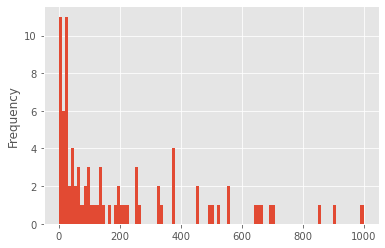

In [11]:
ax = rises['Area_km2'].plot.hist(bins=100)

In [12]:
rumples = df.loc[df['type_text'] == 'Ice rumple']
rumples = rumples.reset_index(drop=True)
rumples

,id_icerise,type,type_text,Name,divide,island,isolated,MOA2003,MOA2009,InSAR,...,bed_mean,bed_min,bed_max,thick,slope_mean,width,length,longi,lati,geometry
0,1,3,Ice rumple,None,0,0,0,1,1,0,...,-262.000000,-269,-256,305.000000,0.082833,0.000000,1.091497,1.129408,-70.434160,"POLYGON ((1.15358 -70.44003, 1.15195 -70.44059..."
1,4,3,Ice rumple,None,0,0,0,0,0,0,...,-432.000000,-511,-333,460.733333,0.123813,0.000000,10.630146,2.404619,-70.154690,"POLYGON ((2.29759 -70.11455, 2.31392 -70.12094..."
2,5,3,Ice rumple,None,0,0,0,0,0,0,...,-557.800000,-571,-548,590.600000,0.032900,0.000000,0.848433,2.539024,-70.209134,"POLYGON ((2.53148 -70.20384, 2.54219 -70.20340..."
3,7,3,Ice rumple,None,0,0,0,0,0,0,...,-335.000000,-337,-334,-9999.000000,-9999.000000,-9999.000000,-9999.000000,3.778457,-70.120782,"POLYGON ((3.77124 -70.11536, 3.78168 -70.11386..."
4,9,3,Ice rumple,None,0,0,0,0,0,1,...,-220.500000,-241,-200,253.500000,0.102550,0.000000,0.365942,5.549930,-70.079109,"POLYGON ((5.53657 -70.08356, 5.53623 -70.08334..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,697,3,Ice rumple,None,0,0,0,0,0,1,...,-456.000000,-461,-451,517.000000,0.104400,0.000000,0.460009,-2.321105,-71.105752,"POLYGON ((-2.31750 -71.11110, -2.31997 -71.111..."
505,699,3,Ice rumple,None,0,0,0,1,1,0,...,-215.500000,-219,-211,257.000000,0.104750,0.502204,0.993769,-2.059675,-70.188334,"POLYGON ((-2.03813 -70.18477, -2.03766 -70.185..."
506,700,3,Ice rumple,None,0,0,0,1,1,0,...,-250.600000,-253,-247,295.400000,0.150220,0.000000,0.834419,-1.948035,-70.216373,"POLYGON ((-1.93375 -70.22405, -1.93990 -70.224..."
507,701,3,Ice rumple,None,0,0,0,0,0,1,...,-516.666667,-524,-507,575.000000,0.116200,0.000000,0.570599,-1.856894,-71.217430,"POLYGON ((-1.84875 -71.22373, -1.85800 -71.223..."


In [13]:

avg_dia_rum = 2 * np.sqrt(rumples['Area_km2'].mean()/np.pi)
avg_dia_rum


4.282635348450984

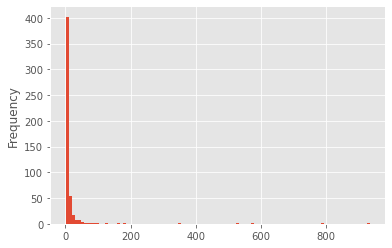

In [14]:
ax = rumples['Area_km2'].plot.hist(bins=100)